This notebook conducts time series analysis.

Data source: household power consumption comes from UCI and refers to https://www.kaggle.com/amirrezaeian/time-series-data-analysis-using-lstm-tutorial/comments. 

In [1]:
import pandas as pd
import numpy as np

power_input = pd.read_csv("household_power_consumption.txt", sep=';',header=0, 
                         parse_dates = {'dt':['Date','Time']}, infer_datetime_format=True, index_col = 'dt',
                         na_values=['nan','?'])

In [2]:
power_input.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [3]:
power_input.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
power_input.describe()

/Applications/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


# Missing value imputation

How many missing values?

In [5]:
power_input.isnull().sum(axis=0)

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [6]:
print (power_input.shape)

(2075259, 7)


In [7]:
power_input = power_input.apply(lambda x:x.fillna(x.mean()), axis=0)

In [8]:
power_input.isnull().sum(axis=0)

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

# How different power usage type varies with time?

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

mpl.rcParams['figure.figsize'] = (8,5)

%matplotlib inline

In [10]:
## It is not necessary generate all data points at second granulatiry
# power_input.iloc[:,-3:].plot()

## Global active power

In [11]:
daily_all = power_input.Global_active_power.resample('D').sum()
daily_mean = power_input.Global_active_power.resample('D').mean()

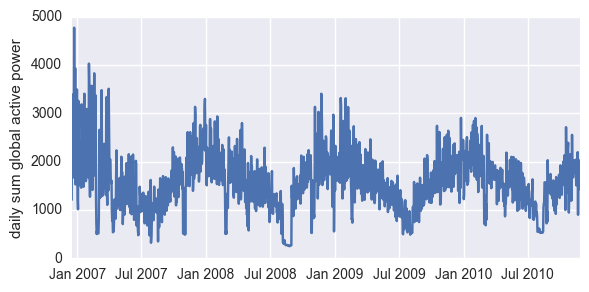

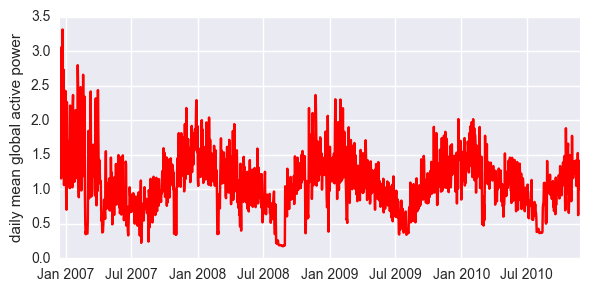

In [12]:
# daily_sub = daily_all.iloc[:1000]
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(daily_all.index, daily_all.values)
ax.set_ylabel('daily sum global active power')
plt.tight_layout()
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(daily_mean.index, daily_mean.values, color='red')
ax.set_ylabel('daily mean global active power')
plt.tight_layout()

## Global reactive power

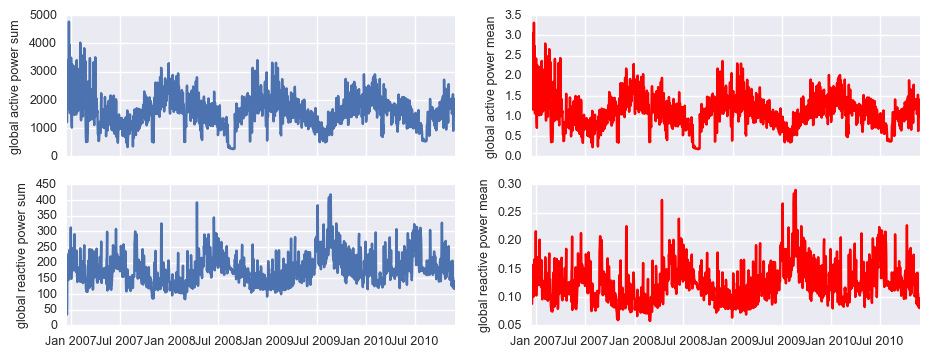

In [13]:
# fig = plt.figure()
# fig.add_subplot(111)
# plt.scatter(x,y)
active_sum = power_input.Global_active_power.resample('D').sum()
active_mean = power_input.Global_active_power.resample('D').mean()
reactive_sum = power_input.Global_reactive_power.resample('D').sum()
reactive_mean = power_input.Global_reactive_power.resample('D').mean()

fig, ax = plt.subplots(2,2, figsize=(11,4), sharex=True)
ax[0,0].plot(active_sum)
ax[0,0].set_ylabel('global active power sum', size=9)
ax[0,0].tick_params(labelsize=9)
ax[0,1].plot(active_mean, color='red')
ax[0,1].set_ylabel('global active power mean', size=9)
ax[0,1].tick_params(labelsize=9)
ax[1,0].plot(reactive_sum)
ax[1,0].set_ylabel('global reactive power sum', size=9)
ax[1,0].tick_params(labelsize=9)
ax[1,1].plot(reactive_mean, color='red')
ax[1,1].set_ylabel('global reactive power mean', size=9)
ax[1,1].tick_params(labelsize=9)

## Intensity

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112f8bd10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1125b8f50>], dtype=object)

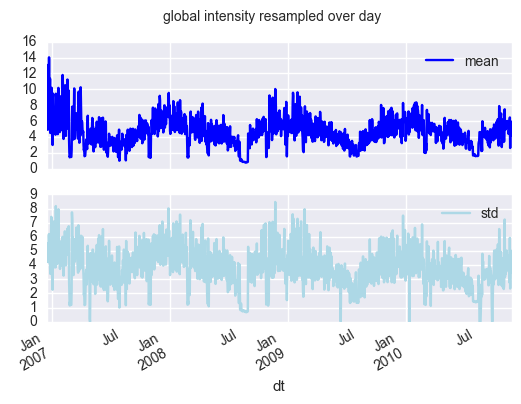

In [14]:
intensity_mean = power_input.Global_intensity.resample('D').agg(['mean','std'])
# if not specifying subplots = True, two line will be shonw in one plot
intensity_mean.plot(subplots = True, title='global intensity resampled over day',figsize=(6,4),style=['blue','lightblue'])

## Visualize daily metrics

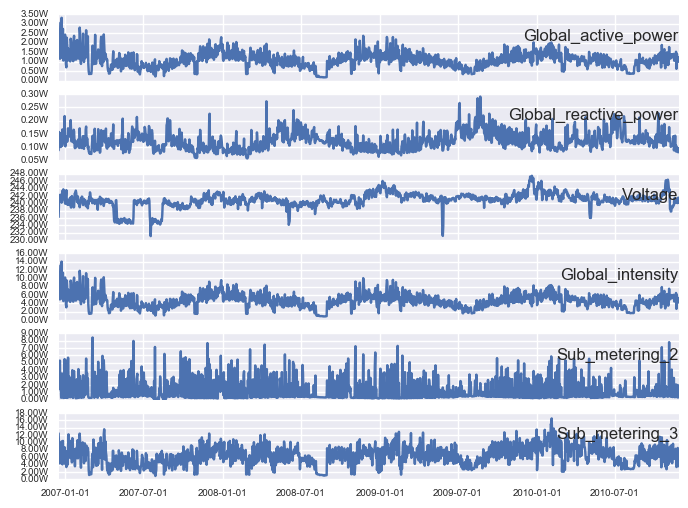

In [15]:
import matplotlib.ticker as mtick
fmt = '{x:,.2f}W'
tick = mtick.StrMethodFormatter(fmt)

cols = [0, 1, 2, 3, 5, 6]
i = 0
groups=cols
values = power_input.resample('D').mean()
years_fmt = mdates.DateFormatter('%Y-%m-%d')
# plot each column
fix, ax = plt.subplots(len(cols),1,figsize=(8,6),sharex=True)
for i,group in enumerate(groups):
    ax[i].plot(values.iloc[:,group])
    ax[i].set_title(power_input.columns[group], y=0.5, loc='right')
    ax[i].tick_params(labelsize=7)
    ax[i].xaxis.set_major_formatter(years_fmt)
    ax[i].yaxis.set_major_formatter(tick)
    # plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=90)

## Visualize different month's sub_metering conditions

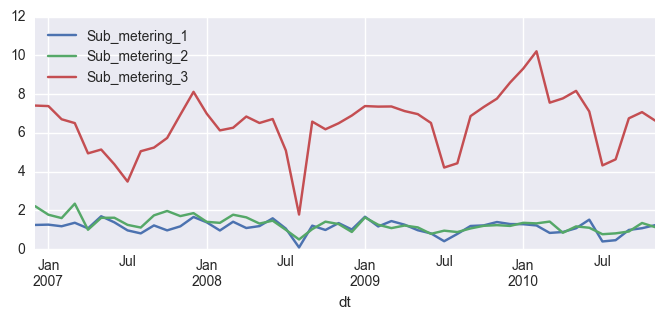

In [16]:
power_input[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].\
apply(lambda x:x.resample('M').mean()).plot(figsize=(8,3))

## Visualization of different quarter's sub_metering conditioins

- using ax.bar() to show plot of different category is tricy (need to specify x position of each category)
- unobjected way is preferred here (However customizing date format is tricy, so change index format)

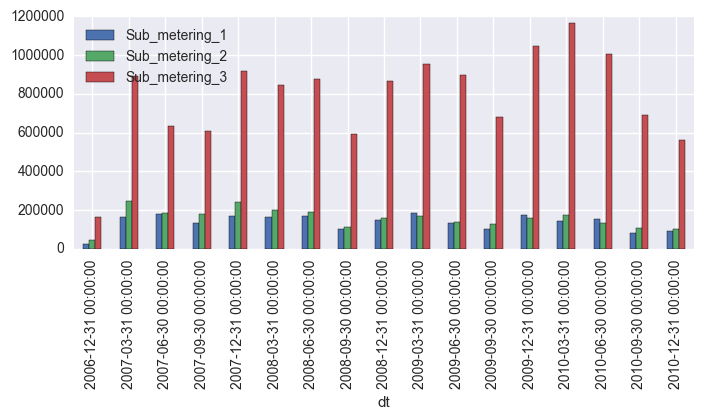

In [17]:
power_input[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].\
apply(lambda x:x.resample('Q').sum()).plot(kind='bar',figsize=(8,3))

## Distribution of metrics

Note that if using:

bin is different compared to individially plotting power.

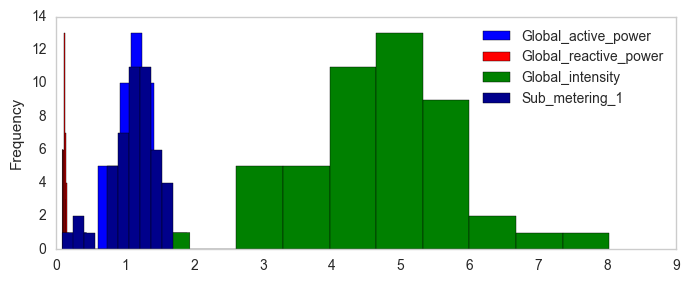

In [ ]:
sns.set_style('whitegrid')
power_input['Global_active_power'].resample('M').mean().plot(kind='hist',legend=True, figsize=(8,3), color='blue',grid=False)
power_input['Global_reactive_power'].resample('M').mean().plot(kind='hist',legend=True, figsize=(8,3), color='red',grid=False)
power_input['Global_intensity'].resample('M').mean().plot(kind='hist',legend=True, figsize=(8,3), color='green',grid=False)
power_input['Sub_metering_1'].resample('M').mean().plot(kind='hist',legend=True, figsize=(8,3),color='darkblue',grid=False)

## Correlation of metrics

Showcase correlation of different variables' percentage change (a commonly used metric in time series).

In [ ]:
# Does not work on a 4G cpu machine.
power_returns = power_input.pct_change()
plt.figure(figsize=(5,5))
sns.jointplot(x='Global_intensity',y='Global_active_power', kind='hex',data=power_returns)